In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
adata = sc.read('../data/20210706_Preprocessed_CellCycle_Regressed_IncreasedDepth.h5ad')
mpp = adata[adata.obs['Cell Types'] == 'HSC/MPP']

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [3]:
new_cluster_names = [
    'HSC/MPP', 'Myeloid prog',
    'Neutrophil prog', 'Ery/Mk prog',
    'Stromal/mesenchymal']
adata.rename_categories('Cell Types', new_cluster_names)

In [4]:
sc.settings.figdir = '../review-figure-updates-pdfs/'

# Make Genes DE Dataframe For Each Group Interaction

In [5]:
sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['Uncoated', 'DLL4'],
                        reference='Uncoated',
                       method='wilcoxon')
dll4_vs_uncoated = mpp.uns['rank_genes_groups']
dll4_vs_uncoated_df = sc.get.rank_genes_groups_df(mpp, group=None)
dll4_vs_uncoated_df = dll4_vs_uncoated_df[dll4_vs_uncoated_df['pvals_adj'] < 0.05]
dll4_vs_uncoated_df.index = dll4_vs_uncoated_df['names']

sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['Uncoated', 'DLL4_VCAM1'], 
                        reference='Uncoated',
                       method='wilcoxon')
dll4vcam1_vs_uncoated = mpp.uns['rank_genes_groups']
dll4vcam1_vs_uncoated_df = sc.get.rank_genes_groups_df(mpp, group=None)
dll4vcam1_vs_uncoated_df = dll4vcam1_vs_uncoated_df[dll4vcam1_vs_uncoated_df['pvals_adj'] < 0.05]
dll4vcam1_vs_uncoated_df.index = dll4vcam1_vs_uncoated_df['names']

sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['DLL4_VCAM1'], reference='DLL4',
                       method='wilcoxon')
dll4vcam1_vs_dll4 = mpp.uns['rank_genes_groups']
dll4vcam1_vs_dll4_df = sc.get.rank_genes_groups_df(mpp, group=None)
raw = dll4vcam1_vs_dll4_df
dll4vcam1_vs_dll4_df = dll4vcam1_vs_dll4_df[dll4vcam1_vs_dll4_df['pvals_adj'] < 0.05]
dll4vcam1_vs_dll4_df.index = dll4vcam1_vs_dll4_df['names']

sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['VCAM1'], reference='Uncoated',
                       method='wilcoxon')
vcam1_vs_uncoated = mpp.uns['rank_genes_groups']
vcam1_vs_uncoated_df = sc.get.rank_genes_groups_df(mpp, group=None)
vcam1_vs_uncoated_df = vcam1_vs_uncoated_df[vcam1_vs_uncoated_df['pvals_adj'] < 0.05]
vcam1_vs_uncoated_df.index = vcam1_vs_uncoated_df['names']

sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['VCAM1', 'DLL4_VCAM1'],
                        reference='VCAM1',
                       method='wilcoxon')
dll4vcam1_vs_vcam1 = mpp.uns['rank_genes_groups']
dll4vcam1_vs_vcam1_df = sc.get.rank_genes_groups_df(mpp, group=None)
dll4vcam1_vs_vcam1_df = dll4vcam1_vs_vcam1_df[dll4vcam1_vs_vcam1_df['pvals_adj'] < 0.05]
dll4vcam1_vs_vcam1_df.index = dll4vcam1_vs_vcam1_df['names']

sc.tl.rank_genes_groups(mpp, groupby='Sample', groups=['VCAM1', 'DLL4'],
                        reference='VCAM1',
                       method='wilcoxon')
dll4_vs_vcam1 = mpp.uns['rank_genes_groups']
dll4_vs_vcam1_df = sc.get.rank_genes_groups_df(mpp, group=None)
dll4_vs_vcam1_df = dll4_vs_vcam1_df[dll4_vs_vcam1_df['pvals_adj'] < 0.05]
dll4_vs_vcam1_df.index = dll4_vs_vcam1_df['names']

Trying to set attribute `.uns` of view, copying.


In [6]:
mpp.layers['scaled'] = sc.pp.scale(mpp, copy=True).X

# VCAM1 vs Uncoated

Number of Genes w padj <0.05 18


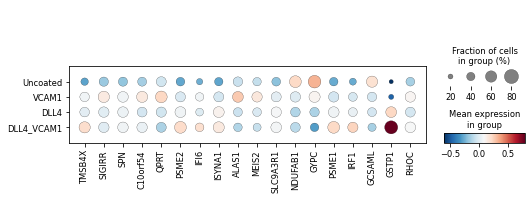

In [7]:
print('Number of Genes w padj <0.05', len(vcam1_vs_uncoated_df[vcam1_vs_uncoated_df['pvals_adj'] < 0.05]))
vcam1_vs_uncoated_df.sort_values(by='pvals_adj', inplace=True)
vcam1_filtered = vcam1_vs_uncoated_df[vcam1_vs_uncoated_df['pvals_adj'] < 0.05]
vcam1_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/vcam1_uncoated_filtered.csv')
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(vcam1_filtered.index),
             layer='scaled',
             cmap='RdBu_r',
             save='_VCAM1_Uncoated.pdf')

# DLL4_VCAM1 VS DLL4

#### Plots will have top 18 genes

In [8]:
n_genes = 18

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Number of Genes w padj <0.05 86


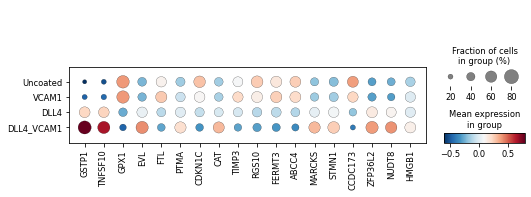

In [9]:
print('Number of Genes w padj <0.05', len(dll4vcam1_vs_dll4_df[dll4vcam1_vs_dll4_df['pvals_adj'] < 0.05]))
dll4vcam1_vs_dll4_df.sort_values(by='pvals_adj', inplace=True)
dv_d_filtered = dll4vcam1_vs_dll4_df[dll4vcam1_vs_dll4_df['pvals_adj'] < 0.05]
dv_d_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/dll4vcam1_dll4_filtered.csv')
sc.pl.dotplot(mpp, groupby='Sample',
              var_names=list(dv_d_filtered.index)[0:n_genes],
             layer='scaled',
             cmap='RdBu_r',
             save='_DLL4VCAM1_vsDLL4.pdf')

# Uncoated vs DLL4

Number of Genes w padj <0.05 637


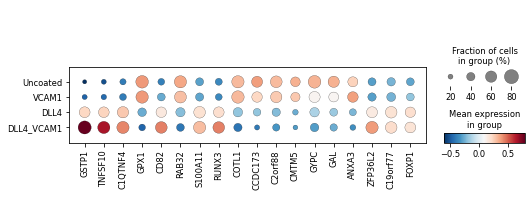

In [10]:
print('Number of Genes w padj <0.05', len(dll4_vs_uncoated_df[dll4_vs_uncoated_df['pvals_adj'] < 0.05]))
dll4_vs_uncoated_df.sort_values(by='pvals_adj', inplace=True)
dll4_uncoated_filtered = dll4_vs_uncoated_df[dll4_vs_uncoated_df['pvals_adj'] < 0.05]
dll4_uncoated_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/dll4_uncoated_filtered.csv')
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(dll4_uncoated_filtered.index)[0:n_genes],
             layer='scaled',
             cmap='RdBu_r',
             save='_DLL4_uncoated.pdf')

# Uncoated vs DLL4VCAM1

Number of Genes w padj <0.05 874


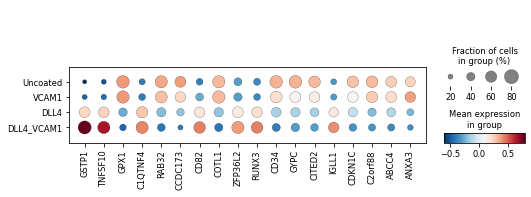

In [11]:
print('Number of Genes w padj <0.05', len(dll4vcam1_vs_uncoated_df[dll4vcam1_vs_uncoated_df['pvals_adj'] < 0.05]))
dll4vcam1_vs_uncoated_df.sort_values(by='pvals_adj', inplace=True)
dll4vcam1_vs_uncoated_filtered = dll4vcam1_vs_uncoated_df[dll4vcam1_vs_uncoated_df['pvals_adj'] < 0.05]
dll4vcam1_vs_uncoated_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/dll4vcam1_uncoated_filtered.csv')
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(dll4vcam1_vs_uncoated_filtered.index)[0:n_genes],
             layer='scaled',
             cmap='RdBu_r',
             save='_DLL4vcam1_uncoated.pdf')

# DLL4 vs VCAM1

Number of Genes w padj <0.05 435


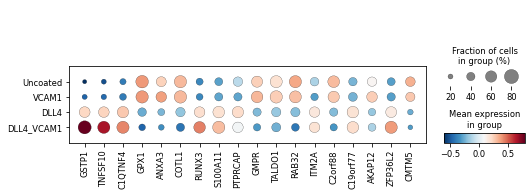

In [12]:
print('Number of Genes w padj <0.05', len(dll4_vs_vcam1_df[dll4_vs_vcam1_df['pvals_adj'] < 0.05]))
dll4_vs_vcam1_df.sort_values(by='pvals_adj', inplace=True)
dll4_vs_vcam1_filtered = dll4_vs_vcam1_df[dll4_vs_vcam1_df['pvals_adj'] < 0.05]
dll4_vs_vcam1_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/dll4_vcam1_filtered.csv')
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(dll4_vs_vcam1_filtered.index)[0: n_genes],
             layer='scaled',
             cmap='RdBu_r',
             save='_dll4_vcam1.pdf')

# VCAM1 vs DLL4_VCAM1

Number of Genes w padj <0.05 619


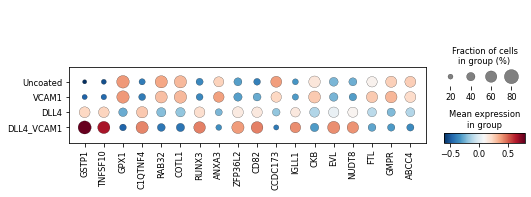

In [13]:
print('Number of Genes w padj <0.05', len(dll4vcam1_vs_vcam1_df[dll4vcam1_vs_vcam1_df['pvals_adj'] < 0.05]))
dll4vcam1_vs_vcam1_df.sort_values(by='pvals_adj', inplace=True)
dll4vcam1_vs_vcam1_filtered = dll4vcam1_vs_vcam1_df[dll4vcam1_vs_vcam1_df['pvals_adj'] < 0.05]
dll4vcam1_vs_vcam1_filtered[['logfoldchanges', 'pvals_adj']].to_csv('../data/differential-expression-dataframes/dll4_vcam1_vcam1_filtered.csv')
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(dll4vcam1_vs_vcam1_filtered.index)[0: n_genes],
             layer='scaled',
             cmap='RdBu_r',
             save='_vcam1_dll4vcam1.pdf')

# Now plot genes that are in DLL4VCAM1 vs DLL4 and VCAM1 vs Uncoated

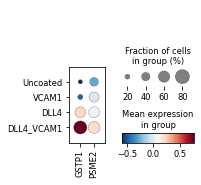

In [14]:
sc.pl.dotplot(mpp,
              groupby='Sample',
              var_names=list(dv_d_filtered[dv_d_filtered.index.isin(vcam1_filtered.index)].index),
             layer='scaled',
             cmap='RdBu_r',
             save='_dll4_vcam1vsdll4+vcam1vsuncoated.pdf')

# Make Arrowhead Matrix of Number of Genes Differentially Expressed Between Each Group

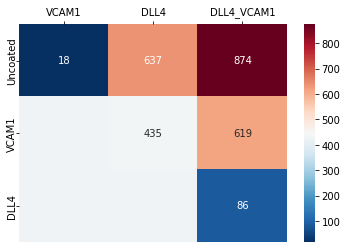

In [17]:
vals = [
    [len(vcam1_filtered), len(dll4_uncoated_filtered), len(dll4vcam1_vs_uncoated_filtered)],
    [428, len(dll4_vs_vcam1_filtered), len(dll4vcam1_vs_vcam1_filtered)],
    [428, 428, len(dv_d_filtered)]
]
anno = [
    [str(len(vcam1_filtered)), str(len(dll4_uncoated_filtered)), str(len(dll4vcam1_vs_uncoated_filtered))],
    ['', str(len(dll4_vs_vcam1_filtered)), str(len(dll4vcam1_vs_vcam1_filtered))],
    ['', '', str(len(dv_d_filtered))]
]
cols = ['VCAM1', 'DLL4', 'DLL4_VCAM1']
rows = ['Uncoated', 'VCAM1', 'DLL4']
ax=plt.gca()
sns.heatmap(data=vals, ax=ax, annot=anno, cmap='RdBu_r', fmt='')
ax.set_xticklabels(cols, ha='center')
ax.set_yticklabels(rows, ha='center', va='center')
ax.xaxis.tick_top()
plt.savefig('../review-figure-updates-pdfs/Supplementary_Figure5_arrowheadplot_reformated.pdf')
plt.show()